<a href="https://colab.research.google.com/github/prawizard/CE888_Repo/blob/main/Project/TweetEval_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import f1_score
import re
import requests

# Constants

In [3]:
TRAIN_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_text.txt"
TRAIN_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_labels.txt"
VAL_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_text.txt"
VAL_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_labels.txt"
TEST_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_text.txt"
TEST_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_labels.txt"
VOCAB_SIZE=2000

#Access Data from the Files

In [4]:
r = requests.get(TRAIN_TEXT_URL, allow_redirects=True)
open('train_text.txt', 'wb').write(r.content)

r = requests.get(TRAIN_LABELS_URL, allow_redirects=True)
open('train_labels.txt', 'wb').write(r.content)

r = requests.get(VAL_TEXT_URL, allow_redirects=True)
open('val_text.txt', 'wb').write(r.content)

r = requests.get(VAL_LABELS_URL, allow_redirects=True)
open('val_labels.txt', 'wb').write(r.content)

r = requests.get(TEST_TEXT_URL, allow_redirects=True)
open('test_text.txt', 'wb').write(r.content)

r = requests.get(TEST_LABELS_URL, allow_redirects=True)
open('test_labels.txt', 'wb').write(r.content)

1720

In [5]:
# temki = urllib.request.urlopen(TARGET_URL)
# type(temki)
# import requests

# response = requests.get(TARGET_URL)
# data = response.text
# type(data)
# data[1]
stream=open("train_text.txt")
tweets=stream.readlines()
stream.close()

val_stream=open("val_text.txt")
val_tweets=val_stream.readlines()
val_stream.close()

test_stream=open("test_text.txt")
test_tweets=test_stream.readlines()
test_stream.close()


In [6]:
print(len(tweets), len(val_tweets))

11916 1324


In [7]:
for i in range(len(tweets)):
  if tweets[i].find('@user')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    tweets[i]=re.sub('@user', '', tweets[i])

for i in range(len(val_tweets)):
  if val_tweets[i].find('@user')!=-1:
    val_tweets[i]=re.sub('@user', '', val_tweets[i])

for i in range(len(test_tweets)):
  if test_tweets[i].find('@user')!=-1:
    test_tweets[i]=re.sub('@user', '', test_tweets[i])
# tweets    
# Words like effing converted to VetsResistSquadron

In [8]:
# tweetStrings = [ tw for tw in tweetStrings if tw!='' and tw!=' '] 

In [9]:
stream=open("train_labels.txt")
tweetsLabels=stream.readlines()
stream.close()

val_stream=open("val_labels.txt")
val_tweetsLabels=val_stream.readlines()
val_stream.close()

test_stream=open("test_labels.txt")
test_tweetsLabels=test_stream.readlines()
test_stream.close()

In [10]:
labels=[0]*len(tweetsLabels)
for i in range(len(tweetsLabels)):
  if tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    labels[i]=int(re.sub('\n', '', tweetsLabels[i]))
# labels    
# Words like effing converted to VetsResistSquadron

val_labels=[0]*len(val_tweetsLabels)
for i in range(len(val_tweetsLabels)):
  if val_tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    val_labels[i]=int(re.sub('\n', '', val_tweetsLabels[i]))

test_labels=[0]*len(test_tweetsLabels)
for i in range(len(test_tweetsLabels)):
  if test_tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    test_labels[i]=int(re.sub('\n', '', test_tweetsLabels[i]))

In [11]:
print(len(labels), len(val_labels), len(test_labels))

11916 1324 860


#Convert to DataFrame

In [12]:
rows=[]
rowIndices=[]
for i in range(len(tweets)):
  rows.append({"TWEET":tweets[i], "CATEGORY":labels[i]})
  rowIndices.append(i+1)
df=pd.DataFrame(rows, index=rowIndices)

val_rows=[]
val_rowIndices=[]
for i in range(len(val_tweets)):
  val_rows.append({"TWEET":val_tweets[i], "CATEGORY":val_labels[i]})
  val_rowIndices.append(i+1)
val_df=pd.DataFrame(val_rows, index=val_rowIndices)

test_rows=[]
test_rowIndices=[]
for i in range(len(test_tweets)):
  test_rows.append({"TWEET":test_tweets[i], "CATEGORY":test_labels[i]})
  test_rowIndices.append(i+1)
test_df=pd.DataFrame(test_rows, index=test_rowIndices)

In [13]:
print(df.head())
print(df.shape)
type(df.CATEGORY)

                                               TWEET  CATEGORY
1   Bono... who cares. Soon people will understan...         0
2   Eight years the republicans denied obama’s pi...         1
3   Get him some line help. He is gonna be just f...         0
4                         She is great. Hi Fiona! \n         0
5   She has become a parody unto herself? She has...         1
(11916, 2)


pandas.core.series.Series

In [14]:
print(val_df.head())
print(val_df.shape)
type(val_df.CATEGORY)

                                               TWEET  CATEGORY
1                WiiU is not even a real console. \n         0
2     If he is from AZ I would put my money on se...         1
3   I thought Canada had strict gun control.  Hel...         0
4                  Following all #Maga patriots p...         0
5             1 Minute of Truth: Gun Control via  \n         0
(1324, 2)


pandas.core.series.Series

In [15]:
print(test_df.head())
print(test_df.shape)
type(test_df.CATEGORY)

                                               TWEET  CATEGORY
1  #ibelieveblaseyford is liar she is fat ugly li...         1
2     I got in a pretty deep debate with my frien...         0
3  ...if you want more shootings and more death, ...         0
4  Angels now have 6 runs. Five of them have come...         0
5  #Travel #Movies and Unix #Fortune combined  Vi...         0
(860, 2)


pandas.core.series.Series

#Check for missing values or null tweets

In [16]:
df.TWEET.isnull().values.any()

False

In [17]:
val_df.TWEET.isnull().values.any()

False

In [18]:
test_df.TWEET.isnull().values.any()

False

In [19]:
df.CATEGORY.isnull().values.any()

False

In [20]:
val_df.CATEGORY.isnull().values.any()

False

In [21]:
test_df.CATEGORY.isnull().values.any()

False

In [22]:
#Check if there are empty tweets(With string length zero).
(df.TWEET.str.len()==0).any()

False

In [23]:
#Check if there are empty tweets(With string length zero).
(val_df.TWEET.str.len()==0).any()

False

In [24]:
#Check if there are empty tweets(With string length zero).
(test_df.TWEET.str.len()==0).any()

False

#Offensive and non-offensive counts

In [25]:
df.CATEGORY.value_counts()

0    7975
1    3941
Name: CATEGORY, dtype: int64

In [26]:
val_df.CATEGORY.value_counts()

0    865
1    459
Name: CATEGORY, dtype: int64

In [27]:
test_df.CATEGORY.value_counts()

0    620
1    240
Name: CATEGORY, dtype: int64

In [28]:
num_offensive=df.CATEGORY.value_counts()[1]
num_nonoffensive=df.CATEGORY.value_counts()[0]

In [29]:
val_num_offensive=val_df.CATEGORY.value_counts()[1]
val_num_nonoffensive=val_df.CATEGORY.value_counts()[0]

In [30]:
test_num_offensive=test_df.CATEGORY.value_counts()[1]
test_num_nonoffensive=test_df.CATEGORY.value_counts()[0]

<function matplotlib.pyplot.show>

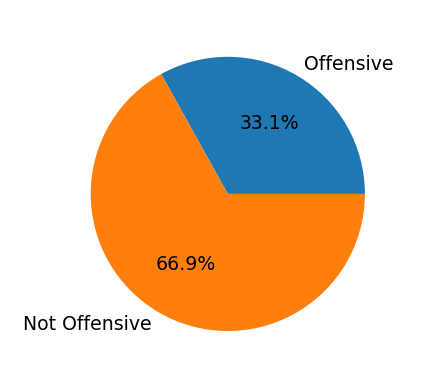

In [31]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[num_offensive, num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

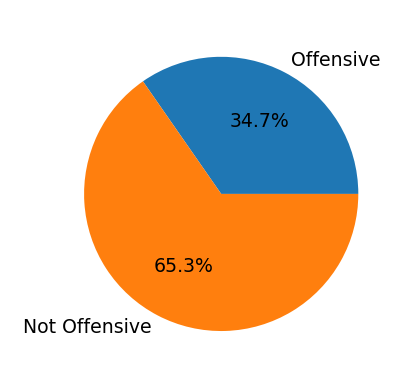

In [32]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[val_num_offensive, val_num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

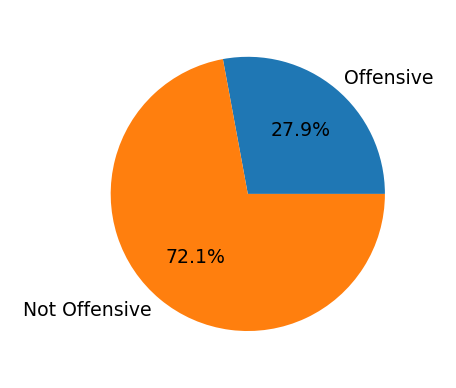

In [33]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[test_num_offensive, test_num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

#NLP

###Text pre-processing

In [34]:
st="Is the tweet Offensive or not?"
st.lower()

'is the tweet offensive or not?'

###Download NLTK Resources(Tokenizer & stopwords)

In [35]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

###Tokenize

In [36]:
word_tokenize(st.lower())

['is', 'the', 'tweet', 'offensive', 'or', 'not', '?']

###Remove stop words. Word stemming

In [37]:
stop_words=set(stopwords.words('english'))

In [38]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words:
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens', '?']

###Removing punctuations

In [39]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words and word.isalpha():
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens']

###Create a function for cleaning tweets

In [40]:
def clean_tweets(tweet, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
  words=word_tokenize(tweet.lower())
  filtered_words=[]
  for word in words:
    if word not in stop_words and word.isalpha():
      stemmed_word=stemmer.stem(word)
      filtered_words.append(stemmed_word)
  return filtered_words

In [41]:
clean_tweets(st)

['tweet', 'offens']

In [42]:
len(df)
type(df.TWEET[0:5])

pandas.core.series.Series

In [43]:
# %%time
tweetsList=df.TWEET
nestedList=tweetsList.apply(clean_tweets)
nestedList[0:5]

1    [bono, care, soon, peopl, understand, gain, no...
2    [eight, year, republican, deni, obama, pick, b...
3    [get, line, help, gon, na, fine, game, went, c...
4                                   [great, hi, fiona]
5    [becom, parodi, unto, certainli, taken, heat, ...
Name: TWEET, dtype: object

In [44]:
# %%time
val_tweetsList=val_df.TWEET
val_nestedList=val_tweetsList.apply(clean_tweets)
val_nestedList[0:5]

1                           [wiiu, even, real, consol]
2           [az, would, put, money, sex, underag, kid]
3    [thought, canada, strict, gun, control, help, ...
4    [follow, maga, patriot, pleas, follow, back, l...
5                    [minut, truth, gun, control, via]
Name: TWEET, dtype: object

In [45]:
# %%time
test_tweetsList=test_df.TWEET
test_nestedList=test_tweetsList.apply(clean_tweets)
test_nestedList[0:5]

1    [ibelieveblaseyford, liar, fat, ugli, libreal,...
2    [got, pretti, deep, debat, friend, told, latin...
3    [want, shoot, death, listen, aclu, black, live...
4    [angel, run, five, come, courtesi, mike, trout...
5    [travel, movi, unix, fortun, combin, visit, sa...
Name: TWEET, dtype: object

In [46]:
# %%time
flatList=[item for subitem in nestedList for item in subitem]
len(flatList)

117489

In [47]:
# %%time
val_flatList=[item for subitem in val_nestedList for item in subitem]
len(val_flatList)

13723

In [48]:
# %%time
test_flatList=[item for subitem in test_nestedList for item in subitem]
len(test_flatList)

10502

In [49]:
tw_id_offensive=df[df.CATEGORY==1].index
tw_id_non_offensive=df[df.CATEGORY==0].index

val_tw_id_offensive=val_df[val_df.CATEGORY==1].index
val_tw_id_non_offensive=val_df[val_df.CATEGORY==0].index

test_tw_id_offensive=test_df[test_df.CATEGORY==1].index
test_tw_id_non_offensive=test_df[test_df.CATEGORY==0].index

In [50]:
tw_nested_off=nestedList.loc[tw_id_offensive]
tw_nested_non_off=nestedList.loc[tw_id_non_offensive]

val_tw_nested_off=val_nestedList.loc[val_tw_id_offensive]
val_tw_nested_non_off=val_nestedList.loc[val_tw_id_non_offensive]

test_tw_nested_off=test_nestedList.loc[test_tw_id_offensive]
test_tw_nested_non_off=test_nestedList.loc[test_tw_id_non_offensive]

In [51]:
flat_off=[item for subitem in tw_nested_off for item in subitem]
flat_non_off=[item for subitem in tw_nested_non_off for item in subitem]
off_words=pd.Series(flat_off).value_counts()
non_off_words=pd.Series(flat_non_off).value_counts()

# 5 most common words in offensive tweets
off_words[0:5]

liber      572
gun        491
like       447
control    400
peopl      341
dtype: int64

In [52]:
val_flat_off=[item for subitem in val_tw_nested_off for item in subitem]
val_flat_non_off=[item for subitem in val_tw_nested_non_off for item in subitem]
val_off_words=pd.Series(val_flat_off).value_counts()
val_non_off_words=pd.Series(val_flat_non_off).value_counts()

# 5 most common words in offensive tweets
val_off_words[0:5]

gun        71
liber      63
like       59
control    59
get        44
dtype: int64

In [53]:
test_flat_off=[item for subitem in test_tw_nested_off for item in subitem]
test_flat_non_off=[item for subitem in test_tw_nested_non_off for item in subitem]
test_off_words=pd.Series(test_flat_off).value_counts()
test_non_off_words=pd.Series(test_flat_non_off).value_counts()

# 5 most common words in offensive tweets
test_off_words[0:5]

liber      45
get        29
antifa     24
conserv    23
shit       22
dtype: int64

In [54]:
# 5 most common words in non-offensive tweets
non_off_words[0:5]

liber      902
gun        889
antifa     766
control    715
conserv    689
dtype: int64

In [55]:
# 5 most common words in non-offensive tweets
val_non_off_words[0:5]

liber      87
conserv    86
antifa     84
gun        74
maga       71
dtype: int64

In [56]:
# 5 most common words in non-offensive tweets
test_non_off_words[0:5]

gun        59
conserv    59
control    57
antifa     50
like       49
dtype: int64

In [57]:
print("Off ",off_words.shape[0]," non-off ",non_off_words.shape[0])

print("Off ",val_off_words.shape[0]," non-off ",val_non_off_words.shape[0])

print("Off ",test_off_words.shape[0]," non-off ",test_non_off_words.shape[0])

Off  6800  non-off  9906
Off  2066  non-off  2887
Off  1515  non-off  3234


In [58]:
stemmed_nested_list=df.TWEET.apply(clean_tweets)
flat_stemmed_list=[item for subitem in stemmed_nested_list for item in subitem]
unique_words=pd.Series(flat_stemmed_list).value_counts()
print("Number of unique words ",unique_words.shape[0])
unique_words.head()

Number of unique words  12337


liber      1474
gun        1380
control    1115
like       1068
antifa     1047
dtype: int64

In [59]:
val_stemmed_nested_list=val_df.TWEET.apply(clean_tweets)
val_flat_stemmed_list=[item for subitem in val_stemmed_nested_list for item in subitem]
val_unique_words=pd.Series(val_flat_stemmed_list).value_counts()
print("Number of unique words ",val_unique_words.shape[0])
val_unique_words.head()

Number of unique words  3808


liber      150
gun        145
control    128
like       125
conserv    119
dtype: int64

In [60]:
test_stemmed_nested_list=test_df.TWEET.apply(clean_tweets)
test_flat_stemmed_list=[item for subitem in test_stemmed_nested_list for item in subitem]
test_unique_words=pd.Series(test_flat_stemmed_list).value_counts()
print("Number of unique words ",test_unique_words.shape[0])
test_unique_words.head()

Number of unique words  3950


liber      88
conserv    82
antifa     74
gun        72
like       69
dtype: int64

In [61]:
frequent_words=unique_words[0:VOCAB_SIZE]
frequent_words[0:10]

liber      1474
gun        1380
control    1115
like       1068
antifa     1047
conserv     942
maga        908
peopl       840
get         803
know        657
dtype: int64

In [62]:
val_frequent_words=val_unique_words[0:VOCAB_SIZE]
val_frequent_words[0:10]

liber      150
gun        145
control    128
like       125
conserv    119
antifa     118
get        100
maga        98
peopl       89
go          88
dtype: int64

In [63]:
test_frequent_words=test_unique_words[0:VOCAB_SIZE]
test_frequent_words[0:10]

liber      88
conserv    82
antifa     74
gun        72
like       69
control    68
get        68
maga       57
want       54
one        51
dtype: int64

In [64]:
word_ids=list(range(0,VOCAB_SIZE))
vocab=pd.DataFrame({"VOCAB_WORD":frequent_words.index.values}, index=word_ids)
vocab.index.name="WORD_ID"
vocab.head()

,VOCAB_WORD
WORD_ID,
0,liber
1,gun
2,control
3,like
4,antifa


In [65]:
val_word_ids=list(range(0,VOCAB_SIZE))
val_vocab=pd.DataFrame({"VOCAB_WORD":val_frequent_words.index.values}, index=word_ids)
val_vocab.index.name="WORD_ID"
val_vocab.head()

,VOCAB_WORD
WORD_ID,
0,liber
1,gun
2,control
3,like
4,conserv


In [66]:
test_word_ids=list(range(0,VOCAB_SIZE))
test_vocab=pd.DataFrame({"VOCAB_WORD":test_frequent_words.index.values}, index=word_ids)
test_vocab.index.name="WORD_ID"
test_vocab.head()

,VOCAB_WORD
WORD_ID,
0,liber
1,conserv
2,antifa
3,gun
4,like


In [67]:
# saved file

#Generate feature and sparse matrix

###Creating a dataframe with one word per column

In [68]:
type(stemmed_nested_list)
type(val_stemmed_nested_list)

pandas.core.series.Series

In [69]:
word_columns_df=pd.DataFrame.from_records(stemmed_nested_list.to_list())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,bono,care,soon,peopl,understand,gain,noth,follow,phoni,celebr,becom,leader,peopl,instead,help,support,fellow,countrymen,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,eight,year,republican,deni,obama,pick,breitbart,outrag,phoni,fake,presid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,get,line,help,gon,na,fine,game,went,could,see,progress,read,brought,miss,deep,ball,presenc,need,littl,time,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,great,hi,fiona,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,becom,parodi,unto,certainli,taken,heat,idiot,could,optic,know,liber,optic,substanc,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [70]:
val_word_columns_df=pd.DataFrame.from_records(val_stemmed_nested_list.to_list())
val_word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,wiiu,even,real,consol,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,az,would,put,money,sex,underag,kid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,thought,canada,strict,gun,control,help,understand,happen,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,follow,maga,patriot,pleas,follow,back,lionsden,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,minut,truth,gun,control,via,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [71]:
test_word_columns_df=pd.DataFrame.from_records(test_stemmed_nested_list.to_list())
test_word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,ibelieveblaseyford,liar,fat,ugli,libreal,snowflak,sold,get,cash,dem,iran,spoke,johnkerryiranmeet,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,got,pretti,deep,debat,friend,told,latino,trump,black,trump,paid,support,said,mean,antifa,paid,domest,terrorist,said,said,fascist,kid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,want,shoot,death,listen,aclu,black,live,matter,antifa,want,public,safeti,listen,polic,profession,studi,year,jeff,session,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,angel,run,five,come,courtesi,mike,trout,homer,trout,connect,pitch,runner,second,third,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,travel,movi,unix,fortun,combin,visit,salisburi,see,sight,wherev,go,old,travel,intern,spi,find,centr,vast,intern,conspiraci,return,home,recal,recal,recal,None,None,None,None,None,None,None,None,None,None,None,None


In [72]:
# features:word_columns_df, labels: df.CATEGORY
word_columns_df.shape
# df.CATEGORY.at[1]

(11916, 43)

In [73]:
# features:word_columns_df, labels: df.CATEGORY
val_word_columns_df.shape
# val_df.CATEGORY.at[1]

(1324, 33)

In [74]:
# features:word_columns_df, labels: df.CATEGORY
test_word_columns_df.shape
# val_df.CATEGORY.at[1]

(860, 37)

###Create a sparse matrix for the training data

In [75]:
word_index=pd.Index(vocab.VOCAB_WORD)
type(word_index)

val_word_index=pd.Index(vocab.VOCAB_WORD)
type(val_word_index)

test_word_index=pd.Index(vocab.VOCAB_WORD)
type(test_word_index)

pandas.core.indexes.base.Index

In [76]:
word_index.get_loc('gun')

1

In [77]:
def make_sparse_matrix(df, indexed_words, labels):
  nr_rows=df.shape[0]
  nr_cols=df.shape[1]
  word_set=set(indexed_words)
  dict_list=[]

  for i in range(nr_rows):
    for j in range(nr_cols):
      word=df.iat[i,j]
      if word in word_set:
        tw_id=df.index[i]
        word_id=indexed_words.get_loc(word)
        category=labels.at[tw_id+1]
        item={'TWEET_ID': tw_id, 'LABEL':category , 'OCCURENCE':1, 'WORD_ID':word_id}

        dict_list.append(item)
  return pd.DataFrame(dict_list)

In [78]:
%%time
sparse_train_df=make_sparse_matrix(word_columns_df, word_index, df.CATEGORY)

sparse_val_df=make_sparse_matrix(val_word_columns_df, val_word_index, val_df.CATEGORY)

sparse_test_df=make_sparse_matrix(test_word_columns_df, test_word_index, test_df.CATEGORY)

CPU times: user 13.5 s, sys: 44.7 ms, total: 13.5 s
Wall time: 13.6 s


In [79]:
sparse_train_df[200:205]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
200,23,1,1,1106
201,23,1,1,1461
202,23,1,1,747
203,23,1,1,259
204,23,1,1,1721


In [80]:
sparse_train_df.shape

(96722, 4)

In [81]:
sparse_val_df.shape

(11122, 4)

In [82]:
sparse_test_df.shape

(7492, 4)

In [83]:
sparse_train_df[-5:]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
96717,11915,1,1,812
96718,11915,1,1,4
96719,11915,1,1,488
96720,11915,1,1,194
96721,11915,1,1,114


###Combine occurences

In [84]:
train_grouped=sparse_train_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        7       0              2
         27      0              1
         56      0              1
         71      0              1
         73      0              1

In [85]:
val_grouped=sparse_val_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
val_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        42      0              1
         130     0              1
1        16      1              1
         98      1              1
         123     1              1

In [86]:
test_grouped=sparse_test_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
test_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        8       1              1
         136     1              1
         307     1              1
         857     1              1
         895     1              1

In [87]:
train_grouped=train_grouped.reset_index()
train_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,7,0,2
1,0,27,0,1
2,0,56,0,1
3,0,71,0,1
4,0,73,0,1


In [88]:
val_grouped=val_grouped.reset_index()
val_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,42,0,1
1,0,130,0,1
2,1,16,1,1
3,1,98,1,1
4,1,123,1,1


In [89]:
test_grouped=test_grouped.reset_index()
test_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,8,1,1
1,0,136,1,1
2,0,307,1,1
3,0,857,1,1
4,0,895,1,1


In [90]:
vocab.at[7,'VOCAB_WORD']

'peopl'

In [91]:
df.TWEET[1]

' Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen. \n'

In [92]:
print(train_grouped.shape ,val_grouped.shape, test_grouped.shape)

(91150, 4) (10469, 4) (7088, 4)


###DataFrame to numpy array

In [93]:
sparse_train_data=train_grouped.to_numpy()
sparse_train_data[:5]

array([[ 0,  7,  0,  2],
       [ 0, 27,  0,  1],
       [ 0, 56,  0,  1],
       [ 0, 71,  0,  1],
       [ 0, 73,  0,  1]])

In [94]:
sparse_val_data=val_grouped.to_numpy()
sparse_val_data[:5]

array([[  0,  42,   0,   1],
       [  0, 130,   0,   1],
       [  1,  16,   1,   1],
       [  1,  98,   1,   1],
       [  1, 123,   1,   1]])

In [95]:
sparse_test_data=test_grouped.to_numpy()
sparse_test_data[:5]

array([[  0,   8,   1,   1],
       [  0, 136,   1,   1],
       [  0, 307,   1,   1],
       [  0, 857,   1,   1],
       [  0, 895,   1,   1]])

In [96]:
sparse_train_data[-5:]

array([[11915,   346,     1,     1],
       [11915,   488,     1,     2],
       [11915,   492,     1,     1],
       [11915,   533,     1,     1],
       [11915,   812,     1,     1]])

In [97]:
sparse_train_data.shape

(91150, 4)

In [98]:
sparse_val_data.shape

(10469, 4)

In [99]:
sparse_test_data.shape

(7088, 4)

In [100]:
print("Number of tweets in the training set : ",np.unique(sparse_train_data[:,0]).size)
print("Number of tweets in the val set : ",np.unique(sparse_val_data[:,0]).size)
print("Number of tweets in the test set : ",np.unique(sparse_test_data[:,0]).size)

Number of tweets in the training set :  11626
Number of tweets in the val set :  1293
Number of tweets in the test set :  842


##Full matrix

###Create a dataframe

In [101]:
column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
column_names[:5]

['TWEET_ID', 'CATEGORY', 0, 1, 2]

In [102]:
len(column_names)

2002

In [103]:
index_names=np.unique(sparse_train_data[:,0])
index_names

array([    0,     1,     2, ..., 11913, 11914, 11915])

In [104]:
full_train_data=pd.DataFrame(index=index_names, columns=column_names)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
full_train_data.fillna(value=0, inplace=True)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Create a full matrix from sparse matrix

In [106]:
def make_full_matrix(sparse_matrix, nr_words, tw_idx=0, word_idx=1, cat_idx=2, freq_idx=3):
    column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
    tw_id_names=np.unique(sparse_matrix[:,0])
    full_matrix=pd.DataFrame(index=tw_id_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)

    for i in range(sparse_matrix.shape[0]):
      tw_nr=sparse_matrix[i][tw_idx]
      word_id=sparse_matrix[i][word_idx]
      label=sparse_matrix[i][cat_idx]
      occurence=sparse_matrix[i][freq_idx]

      full_matrix.at[tw_nr, 'TWEET_ID']=tw_nr
      full_matrix.at[tw_nr, 'CATEGORY']=label
      full_matrix.at[tw_nr, word_id]=occurence

    full_matrix.set_index('TWEET_ID', inplace=True)
    return full_matrix

In [107]:
%%time
full_train_data=make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 9.4 s, sys: 244 ms, total: 9.64 s
Wall time: 9.68 s


In [108]:
full_train_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
full_train_data.tail()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11911,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11914,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11915,1,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
# %%time
full_val_data=make_full_matrix(sparse_val_data, nr_words=VOCAB_SIZE)
full_val_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
# %%time
full_test_data=make_full_matrix(sparse_test_data, nr_words=VOCAB_SIZE)
full_test_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
X_val = full_val_data.loc[:, full_val_data.columns != 'CATEGORY']
y_val = full_val_data.CATEGORY

In [113]:
X_test = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
y_test = full_test_data.CATEGORY

In [114]:
print(X_val.shape, y_val.shape, full_val_data.shape, full_train_data.shape, full_test_data.shape)

(1293, 2000) (1293,) (1293, 2001) (11626, 2001) (842, 2001)


#Naive Bayes Model

###Probability of Offensive

In [115]:
prob_off = full_train_data.CATEGORY.sum()/full_train_data.CATEGORY.size
prob_off

0.33399277481506967

###Total number of words/tokens

In [116]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
tweet_lengths=full_train_features.sum(axis=1)
tweet_lengths.shape

(11626,)

In [118]:
tweet_lengths[:5]

TWEET_ID
0    17
1    10
2    19
3     2
4     7
dtype: int64

In [119]:
total_wc=tweet_lengths.sum()
total_wc

96722

###Number of tokens in Offensive and non offensive tweets

In [120]:
off_lengths=tweet_lengths[full_train_data.CATEGORY==1]
off_lengths.shape

(3883,)

In [121]:
off_wc=off_lengths.sum()
off_wc

35683

In [122]:
non_off_lengths=tweet_lengths[full_train_data.CATEGORY==0]
non_off_lengths.shape

(7743,)

In [123]:
non_off_wc=non_off_lengths.sum()
non_off_wc

61039

In [124]:
tweet_lengths.shape[0]-off_lengths.shape[0]-non_off_lengths.shape[0]

0

In [125]:
print("Avg number of words in offensive tweet : ", off_wc/off_lengths.shape[0])
print("Avg number of words in non offensive tweet : ", non_off_wc/non_off_lengths.shape[0])

Avg number of words in offensive tweet :  9.189544166881277
Avg number of words in non offensive tweet :  7.883120237633992


###Summing the tokens in offensive tweets

In [126]:
full_train_features.shape

(11626, 2000)

In [127]:
train_off_tokens=full_train_features.loc[full_train_data.CATEGORY==1]
train_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
summed_off_tokens=train_off_tokens.sum(axis=0)+1
summed_off_tokens.shape

(2000,)

###Summing the tokens in non offensive tweets

In [129]:
train_non_off_tokens=full_train_features.loc[full_train_data.CATEGORY==0]
train_non_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
summed_non_off_tokens=train_non_off_tokens.sum(axis=0)+1
summed_non_off_tokens.shape

(2000,)

###P(token|offensive)

In [131]:
prob_token_off=summed_off_tokens/(off_wc+VOCAB_SIZE)
prob_token_off[:5]

0    0.015206
1    0.013056
2    0.010641
3    0.011889
4    0.007483
dtype: float64

In [132]:
prob_token_off.sum()

0.9999999999999999

###P(token|not offensive)

In [133]:
prob_token_non_off=summed_non_off_tokens/(non_off_wc+VOCAB_SIZE)
prob_token_non_off[:5]

0    0.014324
1    0.014118
2    0.011358
3    0.009867
4    0.012167
dtype: float64

In [134]:
prob_token_non_off.sum()

1.0

###P(token)

In [135]:
prob_tokens_all=full_train_features.sum(axis=0)/total_wc

In [136]:
prob_tokens_all.sum()

0.9999999999999999

###Set the Prior

$$P(Off \, | \, X) = \frac{P(X \, | \, Off) \, P(Off)} {P(X)}$$

In [137]:
prob_off

0.33399277481506967

In [138]:
X_val=X_val.to_numpy()
y_val=y_val.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
prob_token_off=prob_token_off.to_numpy()
prob_token_non_off=prob_token_non_off.to_numpy()
prob_tokens_all=prob_tokens_all.to_numpy()

In [139]:
np.log(prob_token_off)
prob_token_off.shape

(2000,)

###Joint probability in log format

In [140]:
joint_log_off_val = X_val.dot(np.log(prob_token_off) - np.log(prob_tokens_all)) + np.log(prob_off)
joint_log_non_off_val = X_val.dot(np.log(prob_token_non_off) - np.log(prob_tokens_all)) + np.log(1-prob_off)

In [141]:
joint_log_off_test = X_test.dot(np.log(prob_token_off) - np.log(prob_tokens_all)) + np.log(prob_off)
joint_log_non_off_test = X_test.dot(np.log(prob_token_non_off) - np.log(prob_tokens_all)) + np.log(1-prob_off)

In [142]:
joint_log_off_val[:5]

array([-1.03972238, -0.6401832 , -2.06121757, -3.74419729, -2.35682331])

In [143]:
joint_log_off_val.size

1293

In [144]:
joint_log_non_off_val[:5]

array([-0.54022874, -1.09125574, -0.17629293,  0.48914231, -0.00420036])

In [145]:
joint_log_non_off_val.size

1293

In [146]:
joint_log_non_off_test.size

842

# Making Predictions

### Checking for the higher joint probability

$$P(Off \, | \, X) \, > \, P(NonOff \, | \, X)$$
<center>**OR**</center>
<br>
$$P(Off \, | \, X) \, < \, P(NonOff \, | \, X)$$

In [147]:
# prediction_val = joint_log_off_val > joint_log_non_off_val

In [148]:
prediction_test = joint_log_off_test > joint_log_non_off_test

In [149]:
# prediction_val[-5:]*1

In [150]:
# y_val.size

In [151]:
# y_val[-5:]*1

In [152]:
prediction_test[15:20]*1

array([1, 0, 0, 1, 0])

In [153]:
y_test[15:20]

array([1, 0, 0, 1, 1])

###Simplify

In [154]:
joint_log_off_val = X_val.dot(np.log(prob_token_off)) + np.log(prob_off)
joint_log_non_off_val = X_val.dot(np.log(prob_token_non_off)) + np.log(1-prob_off)

In [155]:
joint_log_off_test = X_test.dot(np.log(prob_token_off)) + np.log(prob_off)
joint_log_non_off_test = X_test.dot(np.log(prob_token_non_off)) + np.log(1-prob_off)

In [156]:
# correct_tweets_val = (y_val == prediction_val).sum()
# print('Val tweets classified correctly', correct_tweets_val)
# numTweets_wrong_val = X_val.shape[0] - correct_tweets_val
# print('Val tweets classified incorrectly', numTweets_wrong_val)

#Result

In [157]:
correct_tweets_test = (y_test == prediction_test).sum()
print('Test tweets classified correctly', correct_tweets_test)
numTweets_wrong_test = X_test.shape[0] - correct_tweets_test
print('Test tweets classified incorrectly', numTweets_wrong_test)

Test tweets classified correctly 697
Test tweets classified incorrectly 145


In [158]:
# correct_tweets_val/len(X_val)

In [159]:
correct_tweets_test/len(X_test)

0.827790973871734

In [160]:
print("Accuracy on test set : ",round(correct_tweets_test/len(X_test)*100,2),"%")

Accuracy on test set :  82.78 %


In [162]:
round(f1_score(y_true=y_test, y_pred=prediction_test),2)

0.65